In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
n = 500

In [3]:
# dimension of data
d = 50

In [4]:
# input data
X = np.random.normal(0,1,size=(n,d))

In [5]:
w = (1/math.sqrt(d)) * np.ones(shape=d)

In [6]:
# discrete set of lambda
k=1000
lam = np.linspace(0.01,1,k)

In [7]:
# (1/n)*X^T*X
S = (1/n) * np.matmul(np.transpose(X), X)
eigvalS, _ = np.linalg.eig(S)

In [8]:
# theoretical optimal lambda
lamStar = math.sqrt(np.trace(S)) / math.sqrt(n)
minER = 0
for j in range(0,d):
    minER = minER + ((w[j]**2) * eigvalS[j]) / (1 + eigvalS[j] / lamStar)**2 + (1/n) * eigvalS[j]**2 / (lamStar + eigvalS[j])**2

In [9]:
# proposition 3.7, Francis Bach. Learning theory from first principle
ER = np.zeros(k)
for i in range(0,k):
    for j in range(0,d):
        ER[i] = ER[i] + ((w[j]**2) * eigvalS[j]) / (1 + eigvalS[j] / lam[i])**2 + (1/n) * eigvalS[j]**2 / (lam[i] + eigvalS[j])**2

In [10]:
# optimal lambda
optLam = lam[np.argmin(ER)]

In [11]:
print('Theory lambda: {0}'.format(lamStar))
print('Optimal lambda: {0}'.format(optLam))

Theory lambda: 0.3166434731287451
Optimal lambda: 0.10018018018018018


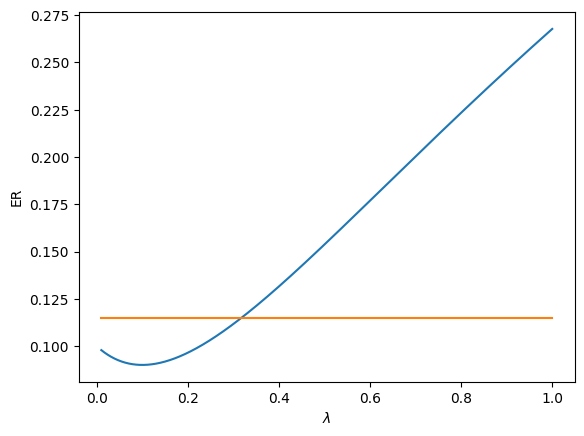

In [12]:
# how ER change respect to lambda, compared to theory min
plt.plot(lam, ER)
plt.plot(lam, minER*np.ones(k))
plt.xlabel('$\lambda$') 
plt.ylabel('ER') 
plt.show()